# Example: Using `HelmholtzDecomposition` for Analytical Function

This notebook demonstrates the use of the `HelmholtzDecomposition` class from the provided script to compute the rotational and divergent components of an analytical velocity field.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ADCPySpec.helmholtz import HelmholtzDecomposition

## Define Analytical Inputs

In [2]:
k = np.linspace(0, 5, 5000) # wavenumber array
# Sum of two Gaussian peaks for across-track and along-track spectra
Cu = np.exp(-np.pi*k**2)
Cv = .5*np.exp(-np.pi*k**2)
# Cross-spectrum: small correlation between the two components
Cuv = np.zeros_like(k)

## Perform Decomposition

In [3]:
# Compute rotational and divergent components
helmholtz = HelmholtzDecomposition(k,Cu,Cv,Cuv)
Fpsi, Fphi, Kpsi, Kphi, E_w = helmholtz.isotropic_decomposition()
print("Fpsi:", Fpsi)
print("Fphi:", Fphi)
print("Kpsi (rotational):", Kpsi)
print("Kphi (divergent):", Kphi)
print("E_w (wave energy):", E_w)

/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:70: RuntimeWarning: divide by zero encountered in log
  s = np.log(self.k)
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:79: RuntimeWarning: invalid value encountered in subtract
  sh, ch = sinh(s[i] - s[i:]), cosh(s[i] - s[i:])
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:80: RuntimeWarning: invalid value encountered in add
  Fp = Cv[i:] * sh + Cu[i:] * ch
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:81: RuntimeWarning: invalid value encountered in add
  Fs = Cu[i:] * sh + Cv[i:] * ch
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/scipy/integrate/_quadrature.py:527: RuntimeWarning: invalid value encountered in divide
  np.true_divide(hsum, hprod,


Fpsi: [           nan            nan            nan ... 1.60450080e-38
 7.89790836e-39 0.00000000e+00]
Fphi: [           nan 1.25472859e+02 6.29829211e+01 ... 3.20995499e-38
 1.57981500e-38 0.00000000e+00]
Kpsi (rotational): [           nan            nan            nan ... 2.06872913e-35
 2.00521865e-35 2.00522488e-35]
Kphi (divergent): [           nan            nan 7.31522275e+01 ... 4.13987622e-35
 4.01162866e-35 4.01164124e-35]
E_w (wave energy): [           nan            nan 1.46304455e+02 ... 8.27975244e-35
 8.02325733e-35 8.02328249e-35]


## Visualize the Results

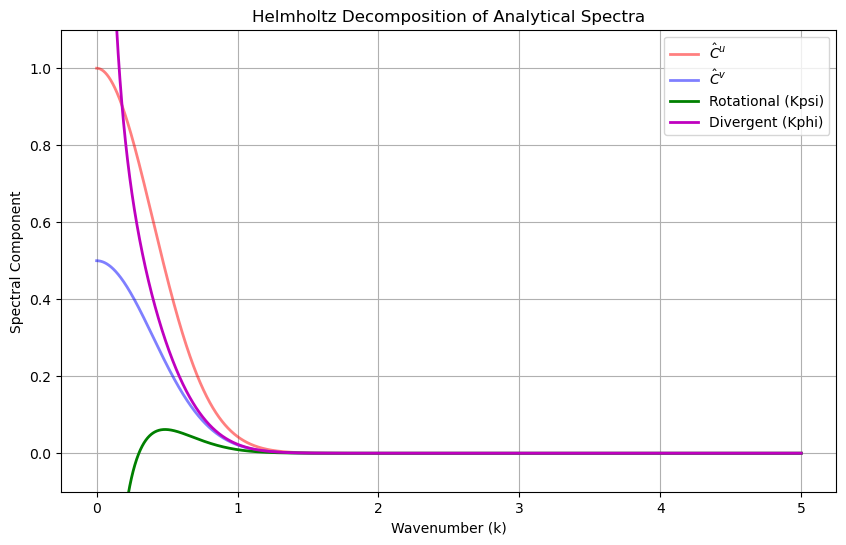

In [6]:
# Plot the components
plt.figure(figsize=(10, 6))
plt.plot(k, Cu, label=r'$\hat C^u$', lw=2, alpha=0.5, c="r")
plt.plot(k, Cv, lw=2, alpha=0.5, label=r'$\hat C^v$', c="b")
plt.plot(k, Kpsi, label='Rotational (Kpsi)', lw=2, c="g")
plt.plot(k, Kphi, label='Divergent (Kphi)', lw=2, c="m")
plt.xlabel('Wavenumber (k)')
plt.ylabel('Spectral Component')
plt.legend()
plt.title('Helmholtz Decomposition of Analytical Spectra')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()